In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
from sklearn.decomposition import PCA

In [8]:
df = pd.read_csv('../data/crawler/unified-events-statistics.csv')
def qtd_eventos(integer):
    return 45 - integer

qtd_eventos = list(map(qtd_eventos, df.isnull().sum(axis=1).tolist()))
df['qtd_eventos'] = qtd_eventos

In [9]:
df = df.drop(['golId','game','event6','event7','event8','event9','event10','event11','event12','event13','event14','event15','event16','event17','event18','event19','event20','event21','event22','event23','event24','event25','event26','event27','event28','event29','event30','event31','event32','event33','event34','event35','event36','event37','event38','event39','event40','event41','event42','event43','event44','event45'],axis=1)
y = df.result
df = df.replace(['BLUE: first_blood',
    'BLUE: dragon',
    'BLUE: herald',
    'BLUE: first_tower_top',
    'BLUE: first_tower_mid',
    'BLUE: first_tower_bot',
    'BLUE: second_tower_top',
    'BLUE: second_tower_mid',
    'BLUE: second_tower_bot',
    'BLUE: third_tower_top',
    'BLUE: third_tower_mid',
    'BLUE: third_tower_bot',
    'BLUE: inhibitor_top',
    'BLUE: inhibitor_mid',
    'BLUE: inhibitor_bot',
    'BLUE: baron',
    'BLUE: elder_dragon',
    'BLUE: nexus_tower',
    'BLUE: nexus',
    'RED: first_blood',
    'RED: dragon',
    'RED: herald',
    'RED: first_tower_top',
    'RED: first_tower_mid',
    'RED: first_tower_bot',
    'RED: second_tower_top',
    'RED: second_tower_mid',
    'RED: second_tower_bot',
    'RED: third_tower_top',
    'RED: third_tower_mid',
    'RED: third_tower_bot',
    'RED: inhibitor_top',
    'RED: inhibitor_mid',
    'RED: inhibitor_bot',
    'RED: baron',
    'RED: elder_dragon',
    'RED: nexus_tower',
    'RED: nexus'], range(38))
x = df.drop(['result'],axis=1)
df.head()

,event1,event2,event3,event4,event5,blueTopGP,blueTopWR,blueTopKDA,blueJungleGP,blueJungleWR,...,redMidWR,redMidKDA,redAdcGP,redAdcWR,redAdcKDA,redSupportGP,redSupportWR,redSupportKDA,result,qtd_eventos
0,19,1,2,1,3,1,1.00,2.00,1,1.0,...,0.20,4.00,0,0.0,0.00,0,0.0,0.0,1,28
1,19,21,1,22,25,1,0.00,3.00,2,1.0,...,0.25,3.55,10,0.4,4.07,2,0.5,5.4,0,20
2,19,2,20,24,2,0,0.00,0.00,1,0.0,...,0.00,20.00,0,0.0,0.00,4,1.0,2.8,0,31
3,20,0,21,20,21,7,0.14,4.14,1,0.0,...,0.20,4.00,5,0.6,9.12,0,0.0,0.0,0,25
4,19,1,2,1,2,1,0.00,2.00,1,1.0,...,0.00,2.35,2,0.0,24.00,0,0.0,0.0,0,23


In [24]:
df

,event1,event2,event3,event4,event5,blueTopGP,blueTopWR,blueTopKDA,blueJungleGP,blueJungleWR,...,redMidWR,redMidKDA,redAdcGP,redAdcWR,redAdcKDA,redSupportGP,redSupportWR,redSupportKDA,result,qtd_eventos
0,19,1,2,1,3,1,1.00,2.00,1,1.0,...,0.20,4.00,0,0.00,0.00,0,0.0,0.0,1,28
1,19,21,1,22,25,1,0.00,3.00,2,1.0,...,0.25,3.55,10,0.40,4.07,2,0.5,5.4,0,20
2,19,2,20,24,2,0,0.00,0.00,1,0.0,...,0.00,20.00,0,0.00,0.00,4,1.0,2.8,0,31
3,20,0,21,20,21,7,0.14,4.14,1,0.0,...,0.20,4.00,5,0.60,9.12,0,0.0,0.0,0,25
4,19,1,2,1,2,1,0.00,2.00,1,1.0,...,0.00,2.35,2,0.00,24.00,0,0.0,0.0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,0,1,2,3,20,0,0.00,0.00,0,0.0,...,0.50,3.67,3,1.00,4.00,2,0.5,11.0,1,24
6010,0,1,21,1,5,2,0.00,1.56,0,0.0,...,0.00,0.00,3,1.00,4.00,0,0.0,0.0,1,19
6011,0,1,21,1,3,0,0.00,0.00,1,1.0,...,0.00,0.00,0,0.00,0.00,0,0.0,0.0,1,20
6012,19,20,2,1,23,2,0.00,0.33,0,0.0,...,0.50,3.15,2,0.50,4.00,0,0.0,0.0,0,18


# of red team victory:  2882
# of blue team victory:  3132


c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



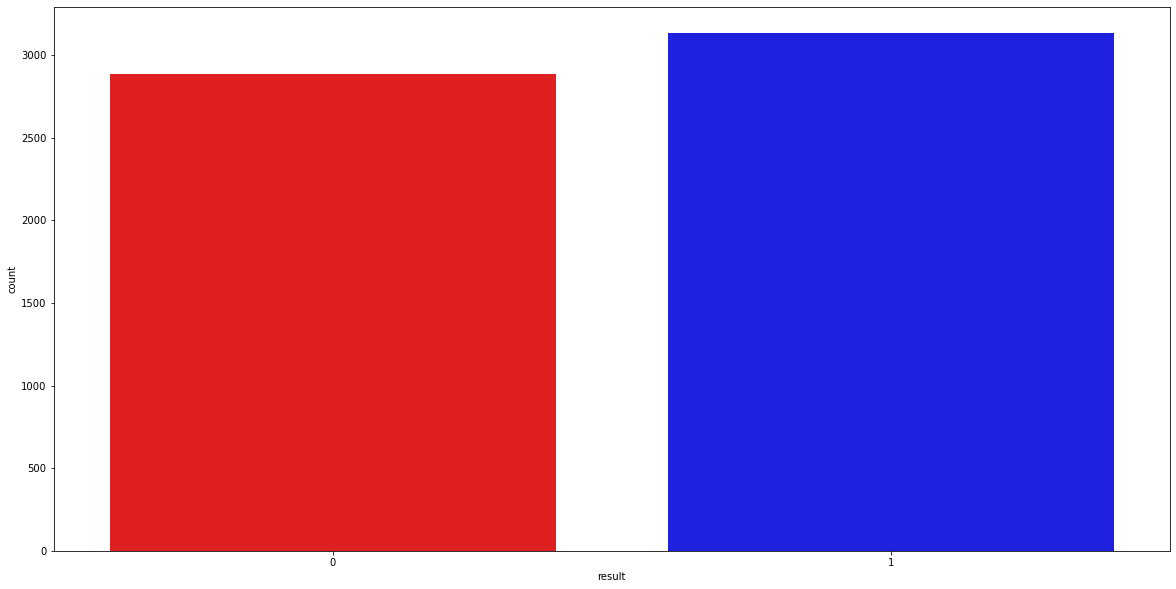

In [26]:
ax = sns.countplot(y,palette=['red','blue'])
B,R = y.value_counts()
print('# of red team victory: ', R)
print('# of blue team victory: ', B)

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



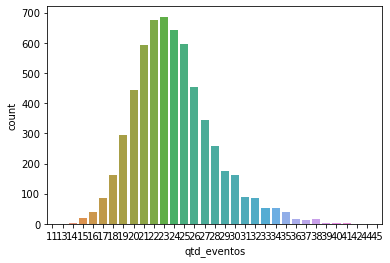

In [12]:
ax = sns.countplot(df['qtd_eventos'])

<AxesSubplot:>

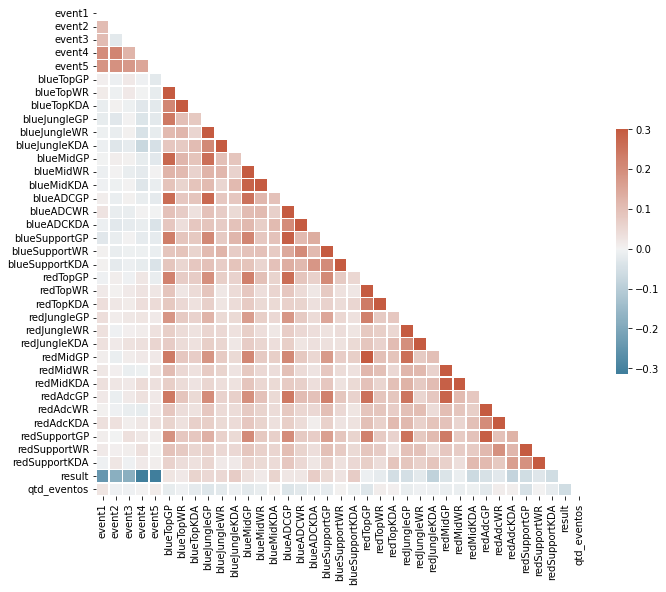

In [13]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 0.98, 'Relação entre qtd de eventos e vencedor')

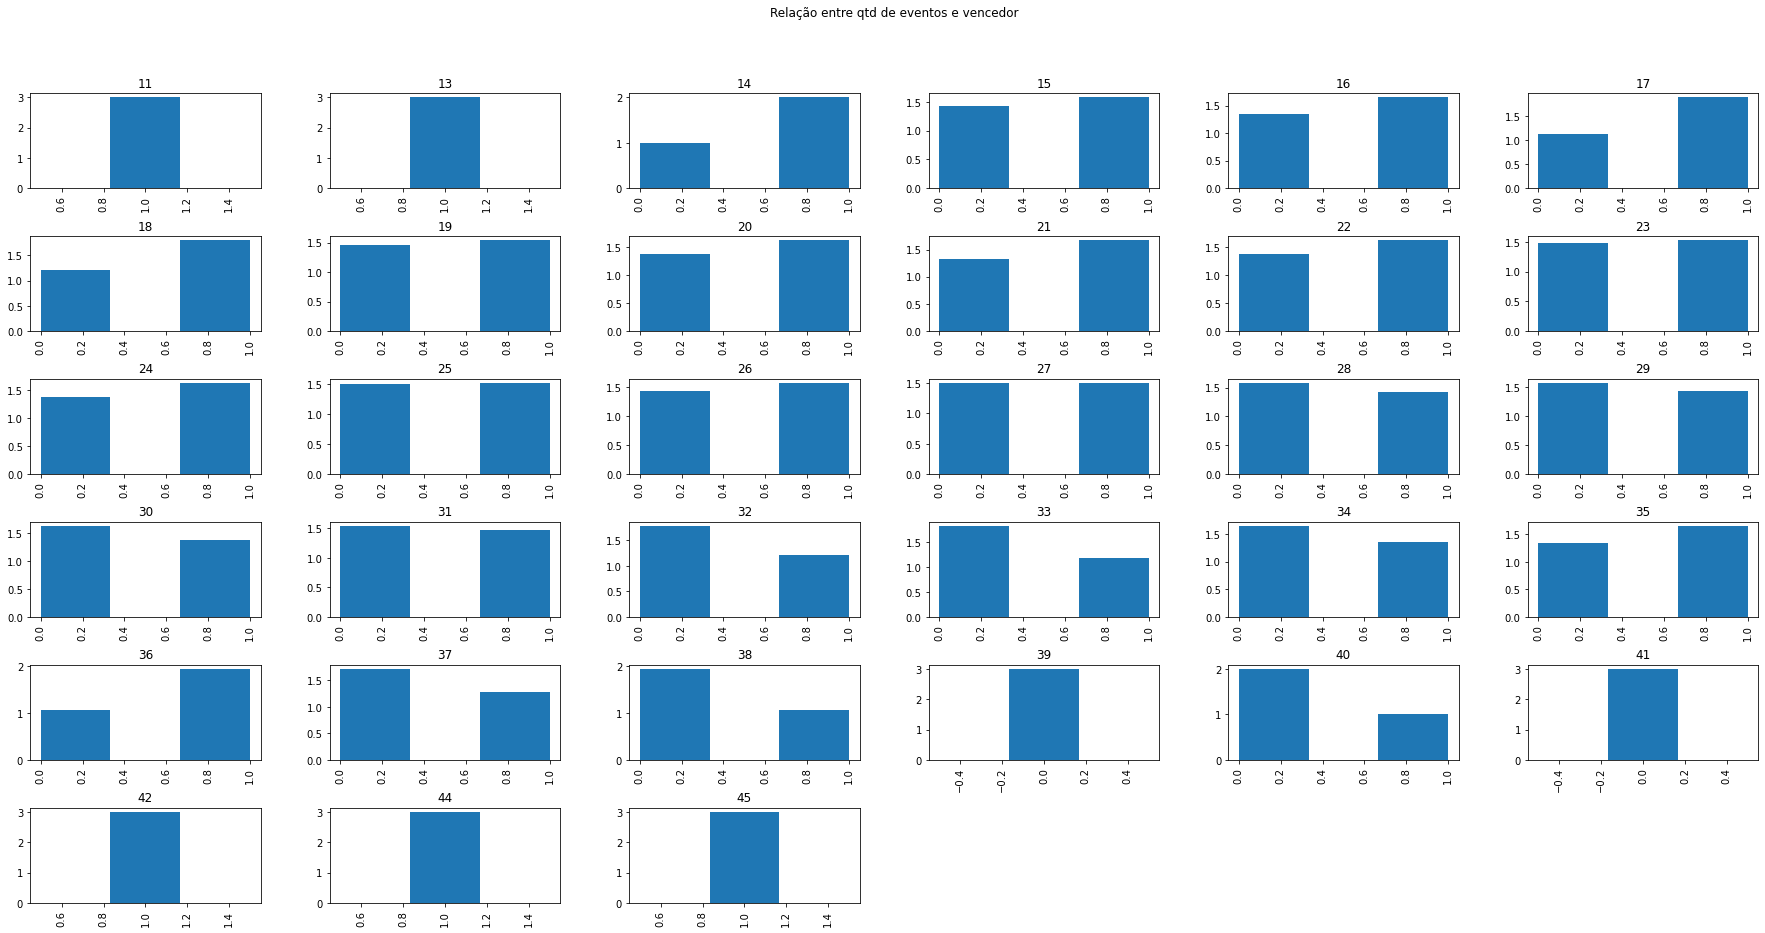

In [14]:
df.hist(column='result', by='qtd_eventos', bins=3,figsize=(30,15),density=1)
plt.suptitle('Relação entre qtd de eventos e vencedor')

In [15]:
features = ['event1','event2','event3', 'event4', 'event5', 'blueTopGP','blueTopWR','blueTopKDA','blueJungleGP','blueJungleWR','blueJungleKDA','blueMidGP','blueMidWR','blueMidKDA','blueADCGP','blueADCWR','blueADCKDA','blueSupportGP','blueSupportWR','blueSupportKDA','redTopGP','redTopWR','redTopKDA','redJungleGP','redJungleWR','redJungleKDA','redMidGP','redMidWR','redMidKDA','redAdcGP','redAdcWR','redAdcKDA','redSupportGP','redSupportWR','redSupportKDA']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['result'])
fig.show()

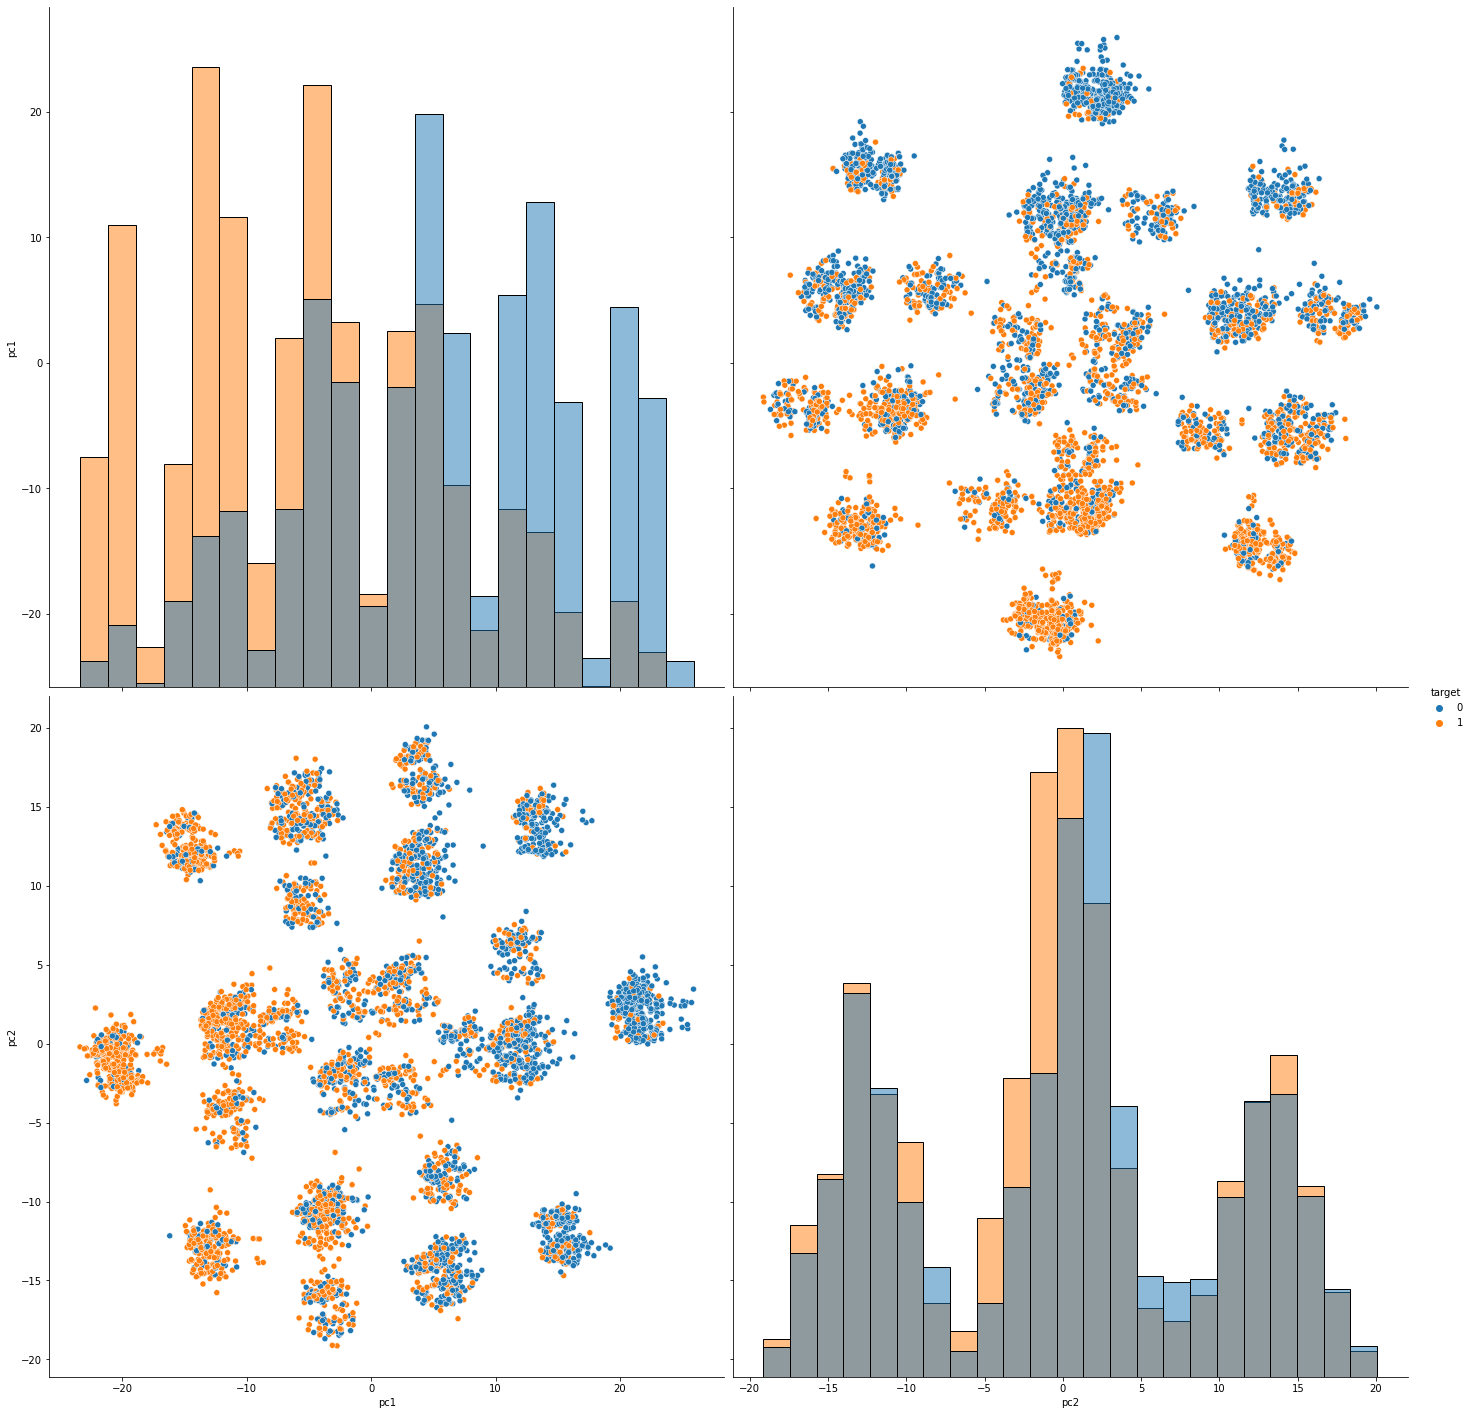

In [16]:
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)
new_df = pd.DataFrame(X_transformed, columns=['pc1', 'pc2'])
new_df['target'] = df['result']
sns.pairplot(new_df, vars=['pc1', 'pc2'],hue='target', diag_kind='hist',height=10)
plt.show()

In [17]:
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline


pca = Pipeline([("standarize", StandardScaler()), ("pca",PCA(n_components = 3)), ("dataframe", FunctionTransformer(lambda x: pd.DataFrame(x, columns = ["First Comp", "Second Comp", "Third Comp"])))]).fit(X)
X3D = pca.transform(X)
px.scatter_3d(x = "First Comp", y = "Second Comp",z = "Third Comp", data_frame= X3D, color= y)

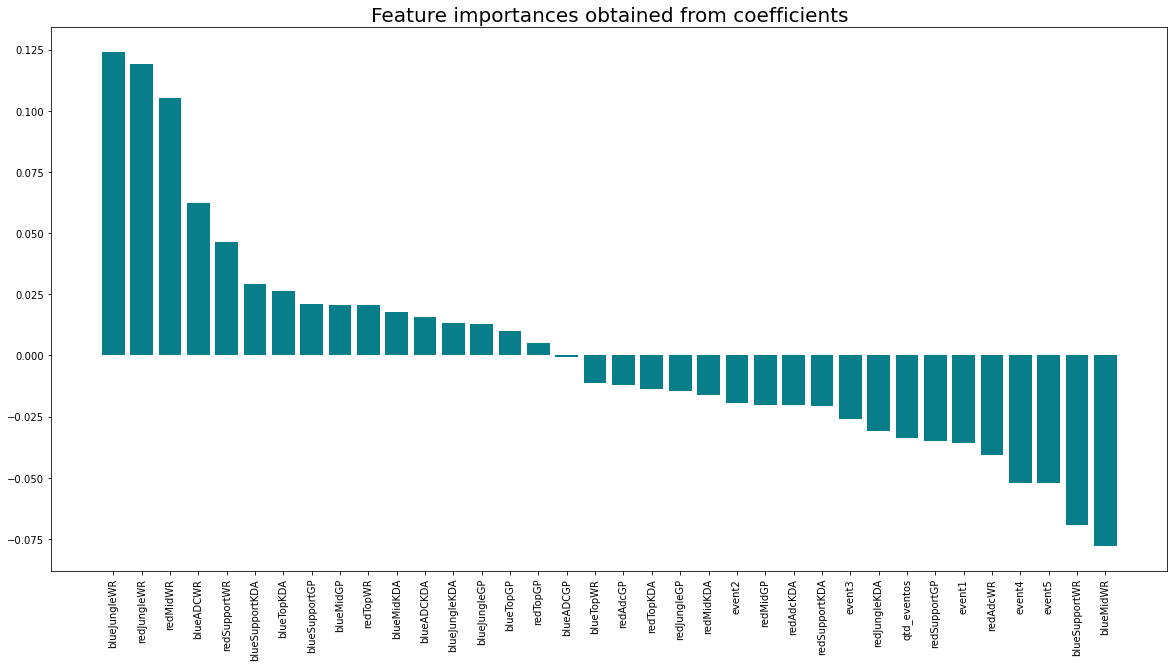

In [18]:
# Fonte dos plots abaixo: https://betterdatascience.com/feature-importance-python/
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=50000)
model.fit(x, y)
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.rcParams["figure.figsize"] = (20, 10)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

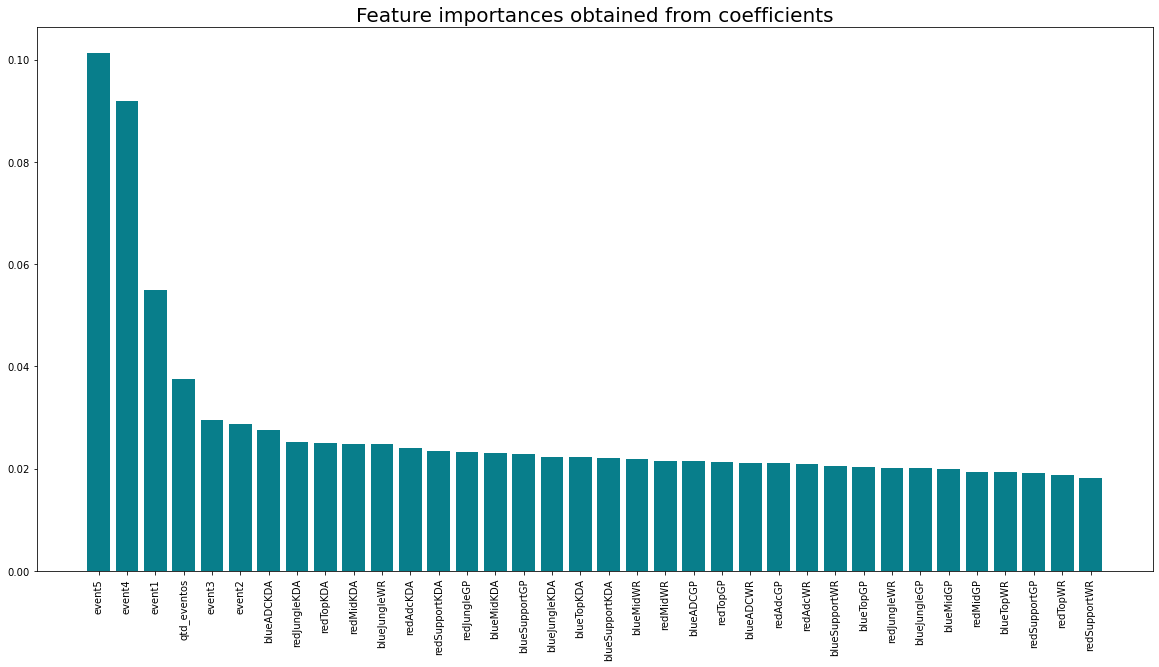

In [19]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x, y)
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': model.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

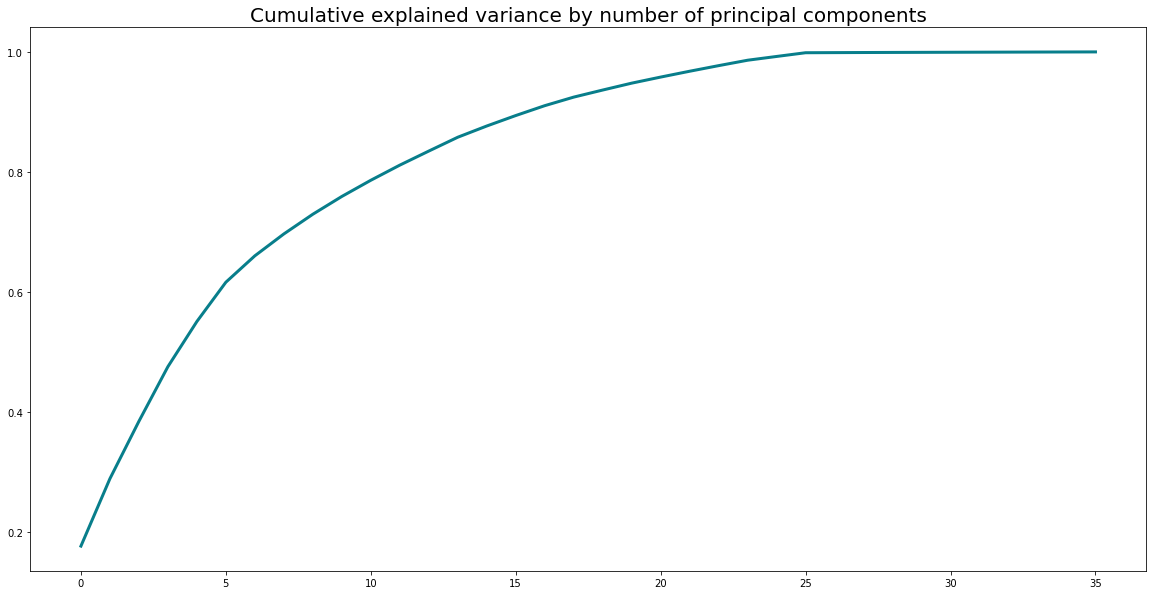

In [20]:
from sklearn.decomposition import PCA

pca = PCA().fit(x)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [21]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(x.columns) + 1)],
    index=x.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
event1,5.518564,0.936116,5.523688,-5.034084,-1.801219,-0.475393,0.051751,-0.003113,-0.011018,-0.022657,...,-0.000353,-0.000038,0.000252,-0.000022,0.000196,0.000017,-0.000150,-0.000040,0.000021,-0.000135
event2,4.946392,-6.002515,-2.662120,1.122418,-4.559622,-0.224057,0.126571,-0.082297,-0.042469,-0.051329,...,0.000234,0.000108,-0.000111,-0.000036,0.000040,-0.000015,0.000144,-0.000124,0.000037,0.000034
event3,3.765257,7.104397,-1.072949,3.547211,-3.287114,-0.313061,0.024827,-0.065548,0.040106,0.051439,...,0.000324,0.000126,0.000006,0.000083,0.000142,0.000329,0.000143,0.000161,-0.000089,-0.000074
event4,5.962413,-1.830895,3.415188,4.988563,3.812914,0.262261,0.218998,0.191563,0.124018,-0.094001,...,0.000123,0.000017,0.000182,0.000260,-0.000159,0.000292,-0.000085,0.000007,-0.000325,-0.000317
event5,6.308397,1.384076,-5.315148,-3.311159,3.464017,0.437630,0.350764,-0.010078,0.050837,-0.098269,...,-0.000409,-0.000164,0.000047,-0.000271,-0.000107,-0.000149,-0.000036,0.000043,0.000089,0.000023


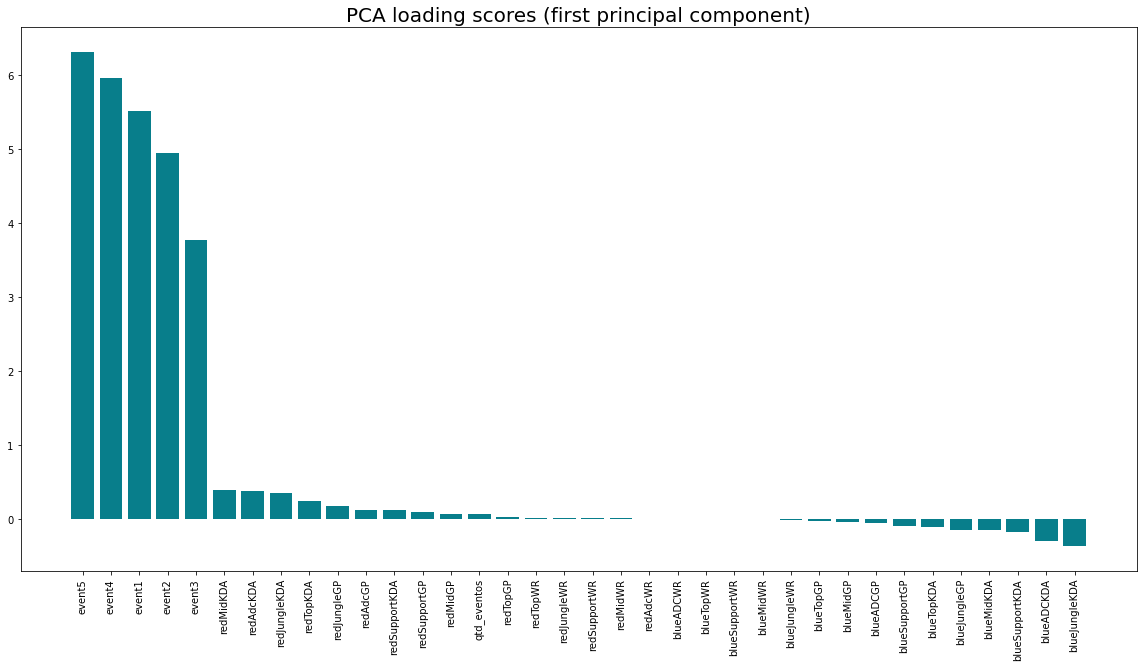

In [22]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

fig = {
    "data": [
        {
            "x": tsne_results[:, 0],
            "y": tsne_results[:, 1],
            "mode": "markers",
            "marker": {"size": 8, "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6014 samples in 0.001s...
[t-SNE] Computed neighbors for 6014 samples in 1.330s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6014
[t-SNE] Computed conditional probabilities for sample 2000 / 6014
[t-SNE] Computed conditional probabilities for sample 3000 / 6014
[t-SNE] Computed conditional probabilities for sample 4000 / 6014
[t-SNE] Computed conditional probabilities for sample 5000 / 6014
[t-SNE] Computed conditional probabilities for sample 6000 / 6014
[t-SNE] Computed conditional probabilities for sample 6014 / 6014
[t-SNE] Mean sigma: 7.584163
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.525986
[t-SNE] KL divergence after 300 iterations: 1.785829
